In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('dm_results_eval_tune_raw.pkl', 'rb') as file:
    results = pickle.load(file)

In [3]:
import pandas as pd
results_lists = []
for res in results:
    res_dict = dict(
        data=res['data'],
        emb_dim=res['emb_dim'],
        w_gen=res['w_gen'],
        w_noise=res['w_noise'],
        w_train=res['w_train'],
        mse_gen=res['mse_gen'],
        mse_dec=res['mse_dec'],
    )
    results_lists.append(res_dict)
results_df = pd.DataFrame(results_lists)

In [4]:
take_log = lambda data: np.log(np.array([arr.item() for arr in data]))

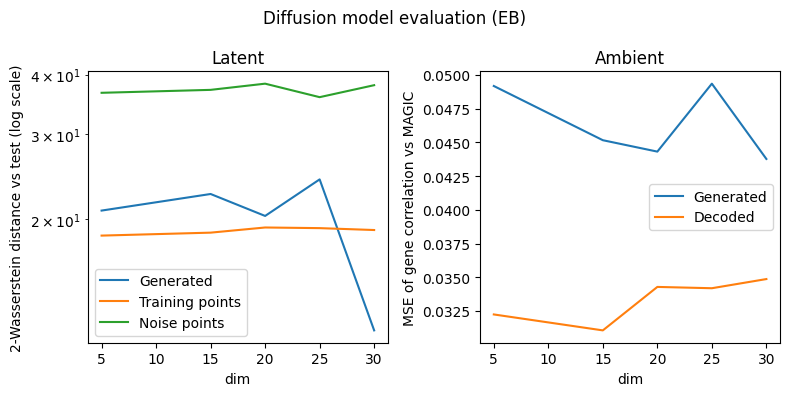

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
eb_res = results_df[results_df['data'] == 'eb_subset_all']
axes[0].plot(eb_res['emb_dim'], eb_res['w_gen'], label='Generated')
axes[0].plot(eb_res['emb_dim'], eb_res['w_train'], label='Training points')
axes[0].plot(eb_res['emb_dim'], eb_res['w_noise'], label='Noise points')
axes[0].set_xlabel('dim')
axes[0].set_ylabel('2-Wasserstein distance vs test (log scale)')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_title('Latent')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_gen'], label='Generated')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_dec'], label='Decoded')
axes[1].set_xlabel('dim')
axes[1].set_ylabel('MSE of gene correlation vs MAGIC')
axes[1].legend()
axes[1].set_title('Ambient')
plt.suptitle('Diffusion model evaluation (EB)')
plt.tight_layout()
plt.show()

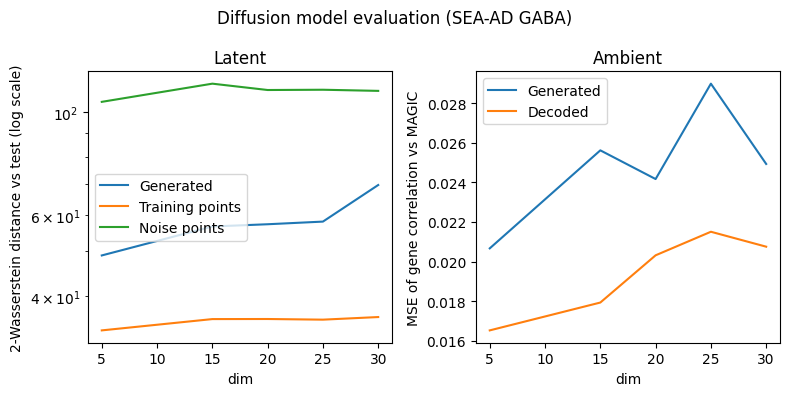

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
eb_res = results_df[results_df['data'] == 'sea_ad_gaba_all']
axes[0].plot(eb_res['emb_dim'], eb_res['w_gen'], label='Generated')
axes[0].plot(eb_res['emb_dim'], eb_res['w_train'], label='Training points')
axes[0].plot(eb_res['emb_dim'], eb_res['w_noise'], label='Noise points')
axes[0].set_xlabel('dim')
axes[0].set_ylabel('2-Wasserstein distance vs test (log scale)')
axes[0].legend()
axes[0].set_yscale('log')
axes[0].set_title('Latent')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_gen'], label='Generated')
axes[1].plot(eb_res['emb_dim'], eb_res['mse_dec'], label='Decoded')
axes[1].set_xlabel('dim')
axes[1].set_ylabel('MSE of gene correlation vs MAGIC')
axes[1].legend()
axes[1].set_title('Ambient')
plt.suptitle('Diffusion model evaluation (SEA-AD GABA)')
plt.tight_layout()
plt.show()

In [7]:
eb_res

data  emb_dim      w_gen     w_noise    w_train   mse_gen  \
5  sea_ad_gaba_all        5    48.9995   105.17234  33.755486  0.020667   
6  sea_ad_gaba_all       15  56.590214   115.12244   35.70637  0.025618   
7  sea_ad_gaba_all       20  57.222553  111.548294  35.721085  0.024168   
8  sea_ad_gaba_all       25  57.980907   111.69954  35.605717  0.028985   
9  sea_ad_gaba_all       30   69.54936   111.07132    36.0708  0.024930   

    mse_dec  
5  0.016524  
6  0.017931  
7  0.020316  
8  0.021506  
9  0.020752

In [8]:
# manual entry from dm_2_eval.ipynb.
eb_2 = {
    'data': 'eb_subset_all',
    'emb_dim': 2,
    'w_gen': 18.743694,
    'w_noise': 33.012802,
    'w_train': 11.246186,
    'mse_gen': 0.11596981831597213,
    'mse_dec': 0.02482747964444071
}
eb_10 = {
    'data': 'eb_subset_all',
    'emb_dim': 10,
    'w_gen': 54.909584,
    'w_noise': 37.00809,
    'w_train': 14.322292,
    'mse_gen': 0.09340316839177037,
    'mse_dec': 0.0274216226418204
}

eb_2 = pd.DataFrame([eb_2])
pd.concat([eb_res, eb_2], ignore_index=True).sort_values('emb_dim')

data  emb_dim      w_gen     w_noise    w_train   mse_gen  \
5    eb_subset_all        2  18.743694   33.012802  11.246186  0.115970   
0  sea_ad_gaba_all        5    48.9995   105.17234  33.755486  0.020667   
1  sea_ad_gaba_all       15  56.590214   115.12244   35.70637  0.025618   
2  sea_ad_gaba_all       20  57.222553  111.548294  35.721085  0.024168   
3  sea_ad_gaba_all       25  57.980907   111.69954  35.605717  0.028985   
4  sea_ad_gaba_all       30   69.54936   111.07132    36.0708  0.024930   

    mse_dec  
5  0.024827  
0  0.016524  
1  0.017931  
2  0.020316  
3  0.021506  
4  0.020752

In [9]:
eb_res

data  emb_dim      w_gen     w_noise    w_train   mse_gen  \
5  sea_ad_gaba_all        5    48.9995   105.17234  33.755486  0.020667   
6  sea_ad_gaba_all       15  56.590214   115.12244   35.70637  0.025618   
7  sea_ad_gaba_all       20  57.222553  111.548294  35.721085  0.024168   
8  sea_ad_gaba_all       25  57.980907   111.69954  35.605717  0.028985   
9  sea_ad_gaba_all       30   69.54936   111.07132    36.0708  0.024930   

    mse_dec  
5  0.016524  
6  0.017931  
7  0.020316  
8  0.021506  
9  0.020752

In [10]:
res

{'w_increasing_noise': array([[1.00000000e-01, 2.03214607e+01],
        [2.00000000e-01, 3.96447525e+01],
        [3.00000000e-01, 5.98163452e+01],
        [4.00000000e-01, 7.97855377e+01],
        [5.00000000e-01, 9.99509048e+01],
        [6.00000000e-01, 1.19227211e+02],
        [7.00000000e-01, 1.38546173e+02],
        [8.00000000e-01, 1.58398636e+02],
        [9.00000000e-01, 1.78154495e+02]]),
 'w_noise': array(111.07132, dtype=float32),
 'w_gen': array(69.54936, dtype=float32),
 'w_train': array(36.0708, dtype=float32),
 'latent_train_subset': array([[ -43.049187 ,   31.115114 ,   -3.2053425, ...,  -42.13344  ,
          -95.12567  ,   17.666218 ],
        [  46.90755  ,   -6.2108126,   19.31457  , ...,   17.1406   ,
         -131.09674  ,  -30.296312 ],
        [  48.572994 ,  -15.675593 ,   12.357952 , ...,   14.476212 ,
         -133.69737  ,  -23.779028 ],
        ...,
        [ -34.003273 ,   35.080147 ,  -27.248737 , ...,  -77.00638  ,
         -150.88599  ,   23.855272 ],


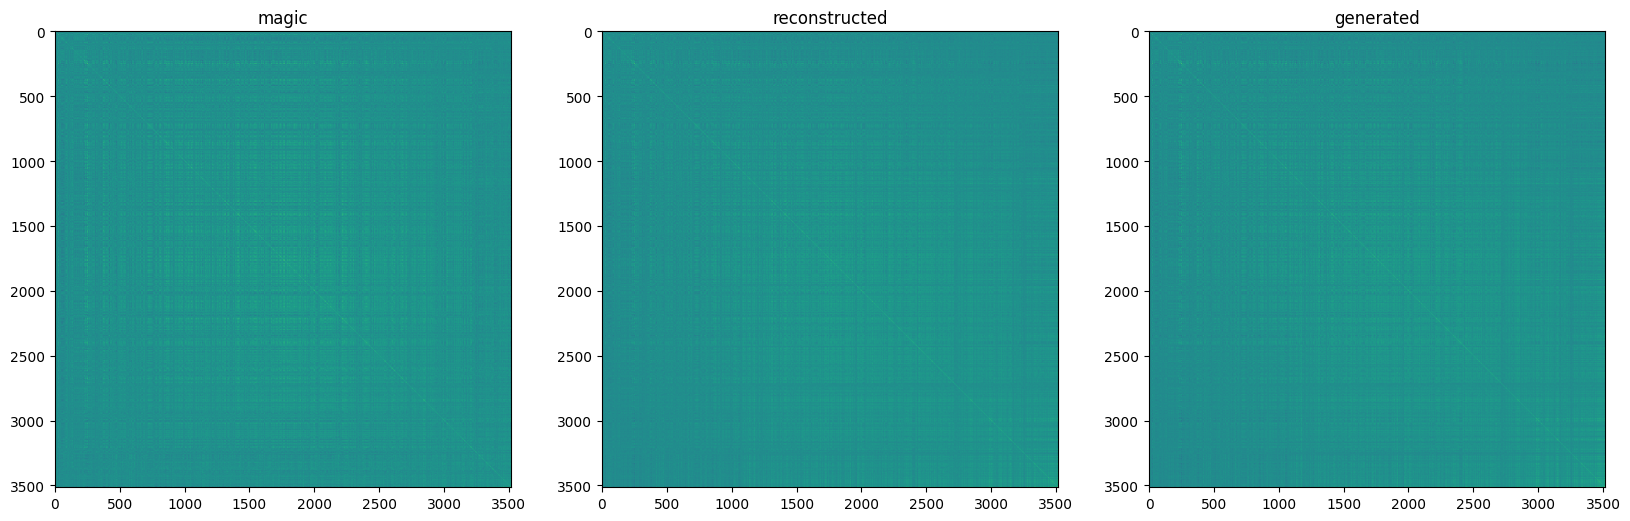

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(res['corrs_magic'])
plt.title('magic')
plt.subplot(1, 3, 2)
plt.imshow(res['corrs_dec'])
plt.title('reconstructed')
plt.subplot(1, 3, 3)
plt.imshow(res['corrs_gen'])
plt.title('generated')
plt.show()

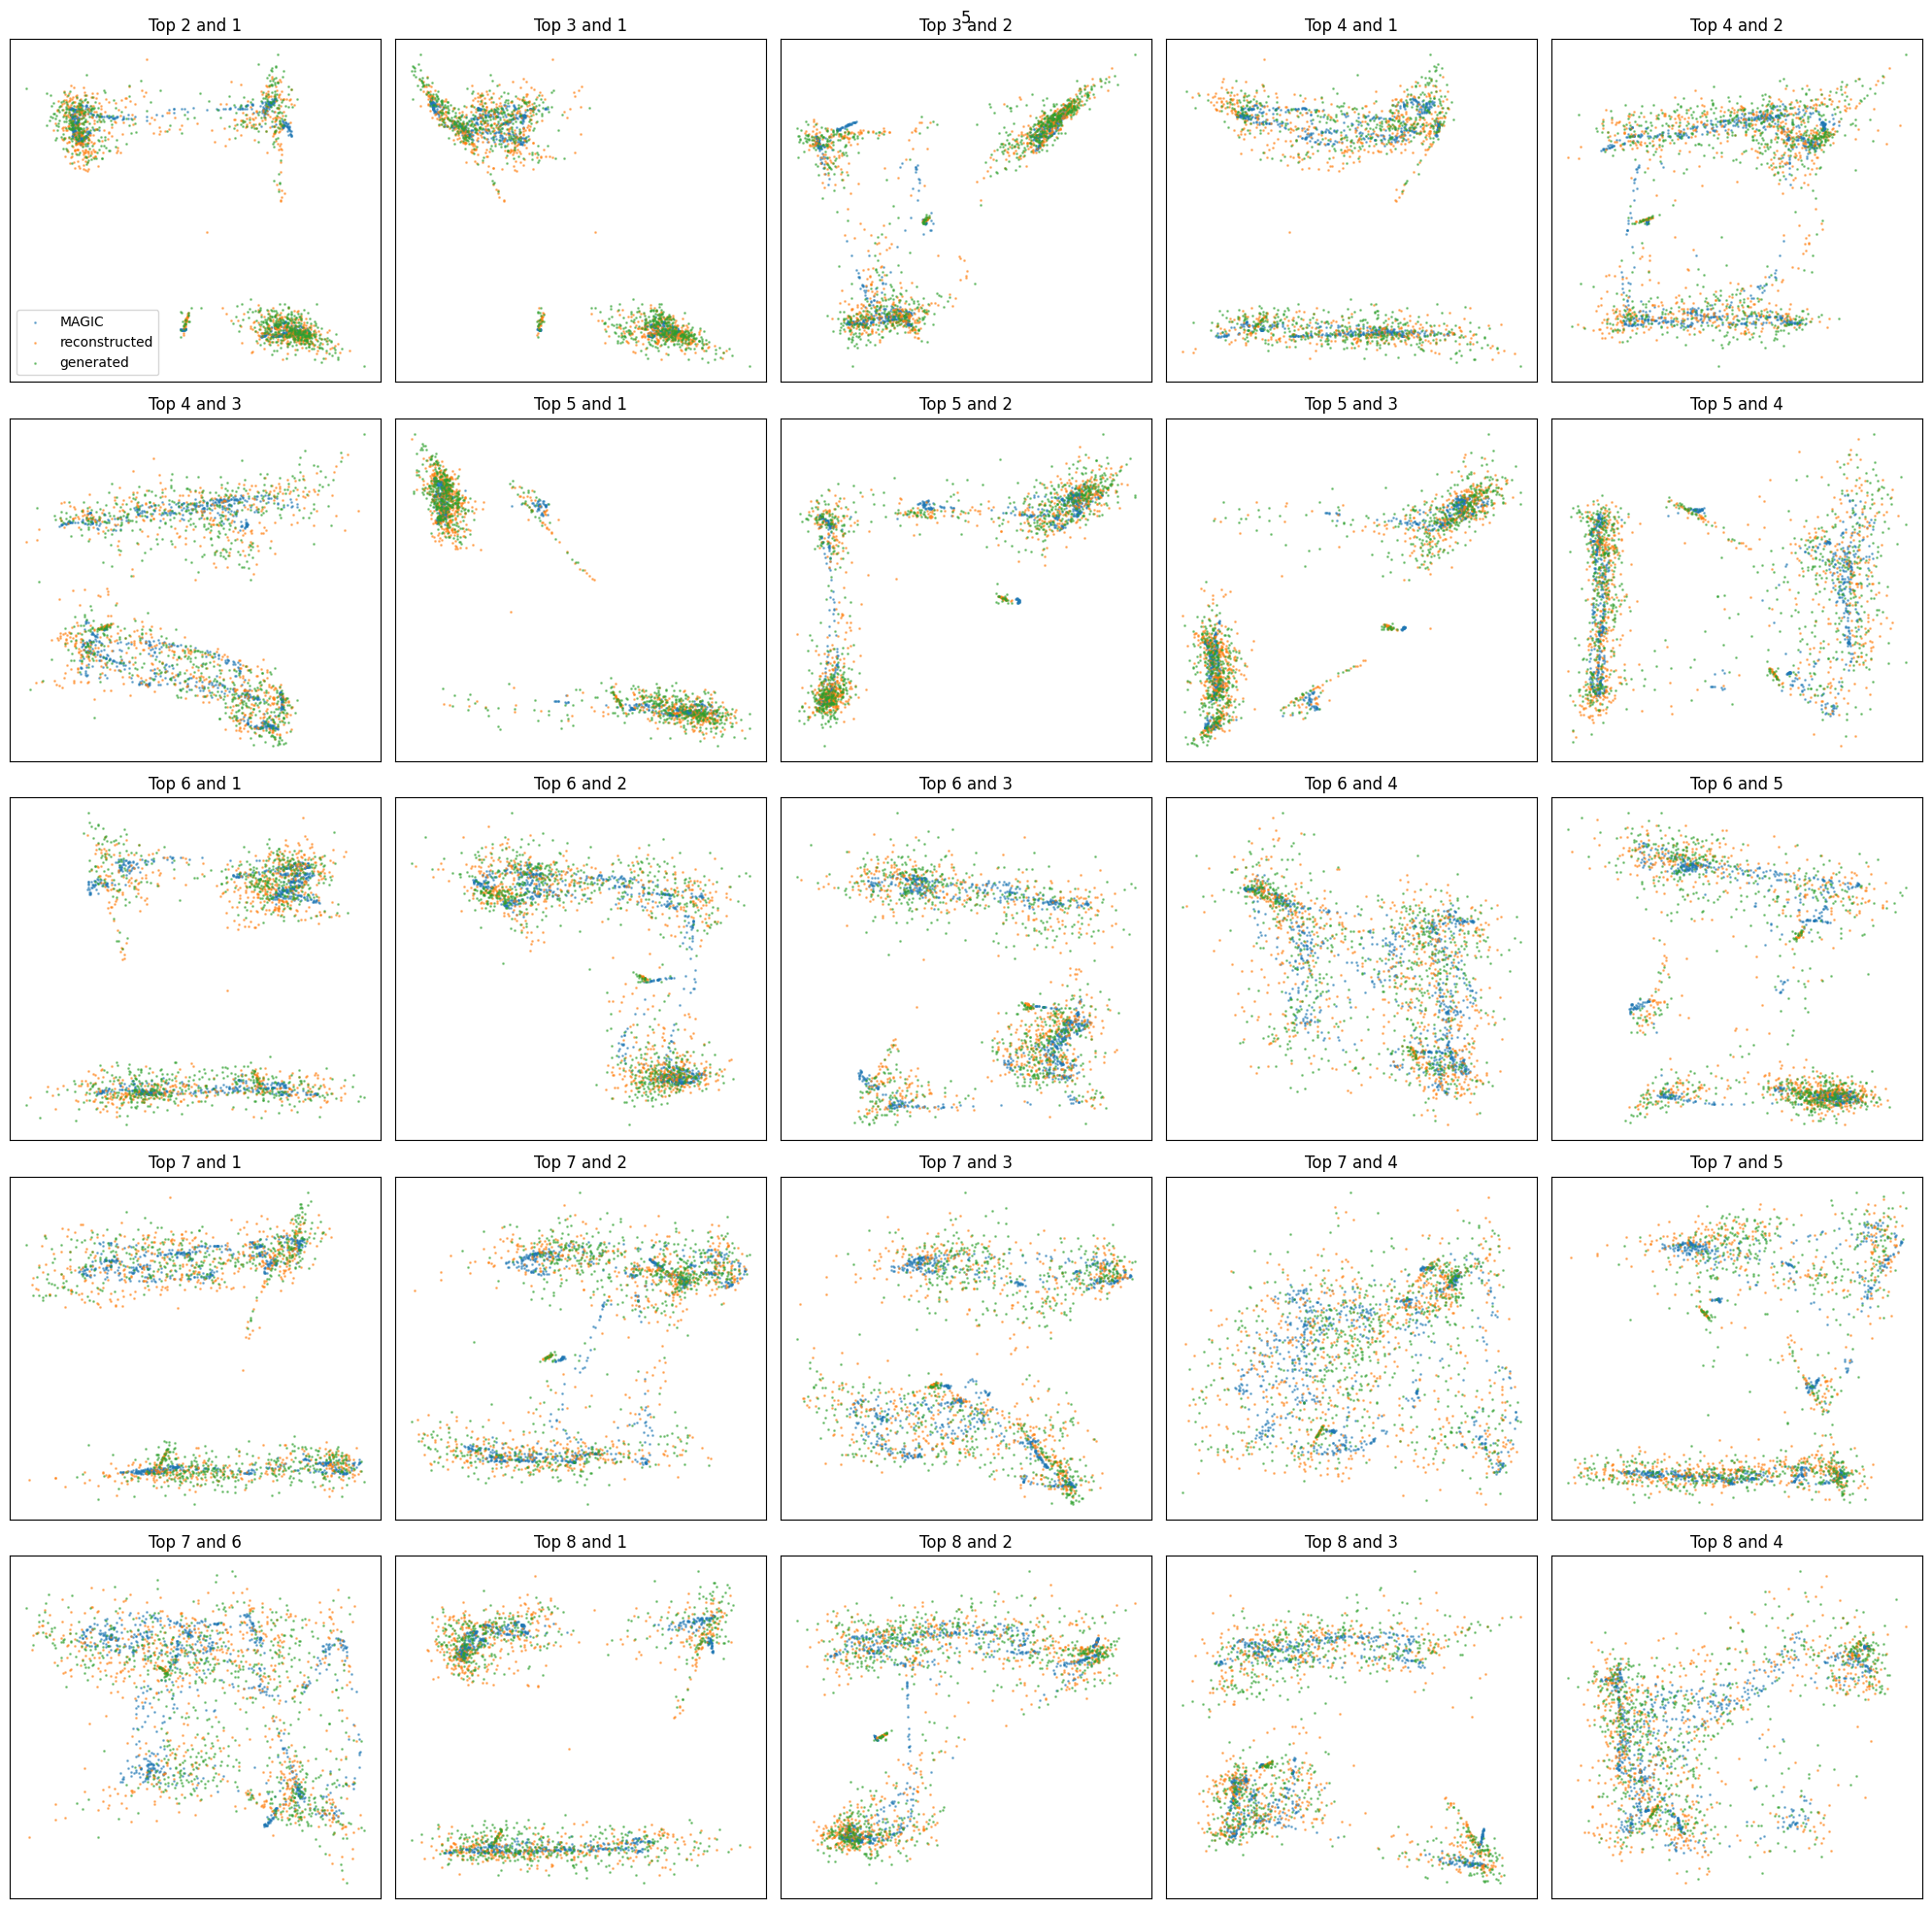

In [12]:
import matplotlib.pyplot as plt

# Initialize variables for managing the 5x5 grid and figure creation
fig_counter = 0
subplot_index = 1
max_subplots_per_fig = 25  # 5x5 grid
fig = plt.figure(figsize=(20, 20))  # Increase figsize as needed

for i in range(10):
    for j in range(i):
        # Check if the current figure's subplot limit has been reached
        if subplot_index > max_subplots_per_fig:
            break
            # # Show the current figure and start a new figure
            # plt.show()
            # fig_counter += 1
            # subplot_index = 1  # Reset subplot index for the new figure
            # fig = plt.figure(fig_counter, figsize=(20, 20))  # Create a new figure with a larger size

        # Create a subplot in the current figure
        ax = fig.add_subplot(5, 5, subplot_index)
        ax.scatter(res['orig_magic'][:,res['top_100_idx'][i]], res['orig_magic'][:,res['top_100_idx'][j]], s=1, alpha=0.5, label='MAGIC' if subplot_index == 1 else "")
        ax.scatter(res['orig_dec'][:,res['top_100_idx'][i]], res['orig_dec'][:,res['top_100_idx'][j]], s=1, alpha=0.5, label='reconstructed' if subplot_index == 1 else "")
        ax.scatter(res['orig_gen'][:,res['top_100_idx'][i]], res['orig_gen'][:,res['top_100_idx'][j]], s=1, alpha=0.5, label='generated' if subplot_index == 1 else "")
        ax.set_title(f'Top {i+1} and {j+1}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Increment the subplot index
        subplot_index += 1

        # Add the legend to the first subplot of each figure for clarity
        if subplot_index == 2:
            ax.legend()


# Show the last figure
plt.suptitle('5')
plt.tight_layout()
plt.show()


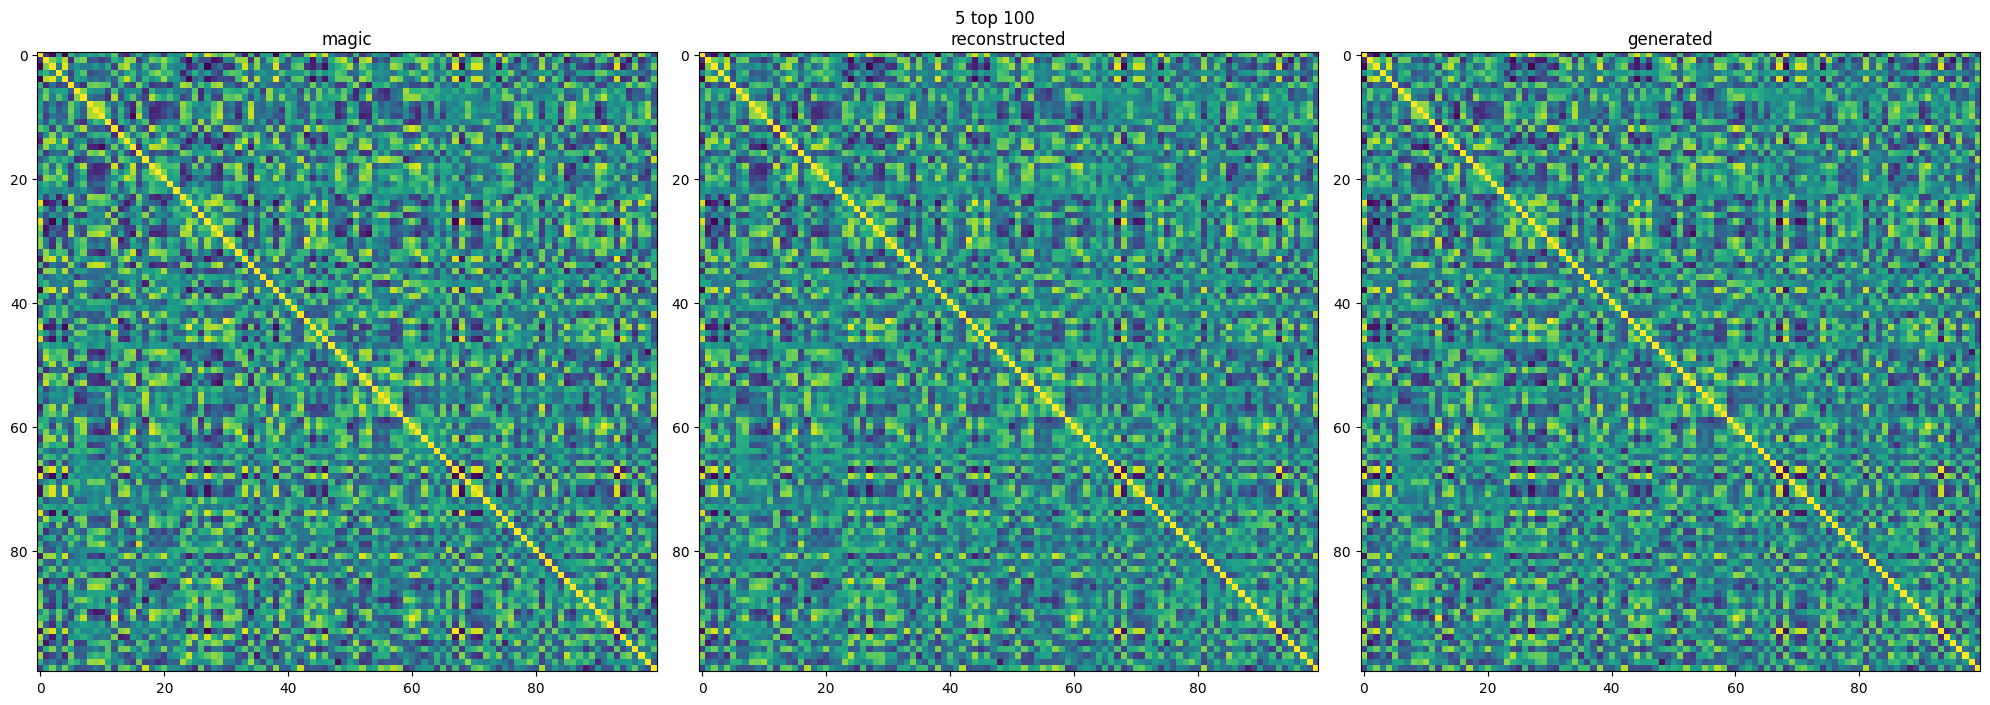

In [13]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.imshow(res['corrs_magic'][:100][:,:100])
plt.title('magic')
plt.subplot(1, 3, 2)
plt.imshow(res['corrs_dec'][:100][:,:100])
plt.title('reconstructed')
plt.subplot(1, 3, 3)
plt.imshow(res['corrs_gen'][:100][:,:100])
plt.title('generated')
plt.suptitle('5 top 100')
plt.tight_layout()
plt.show()

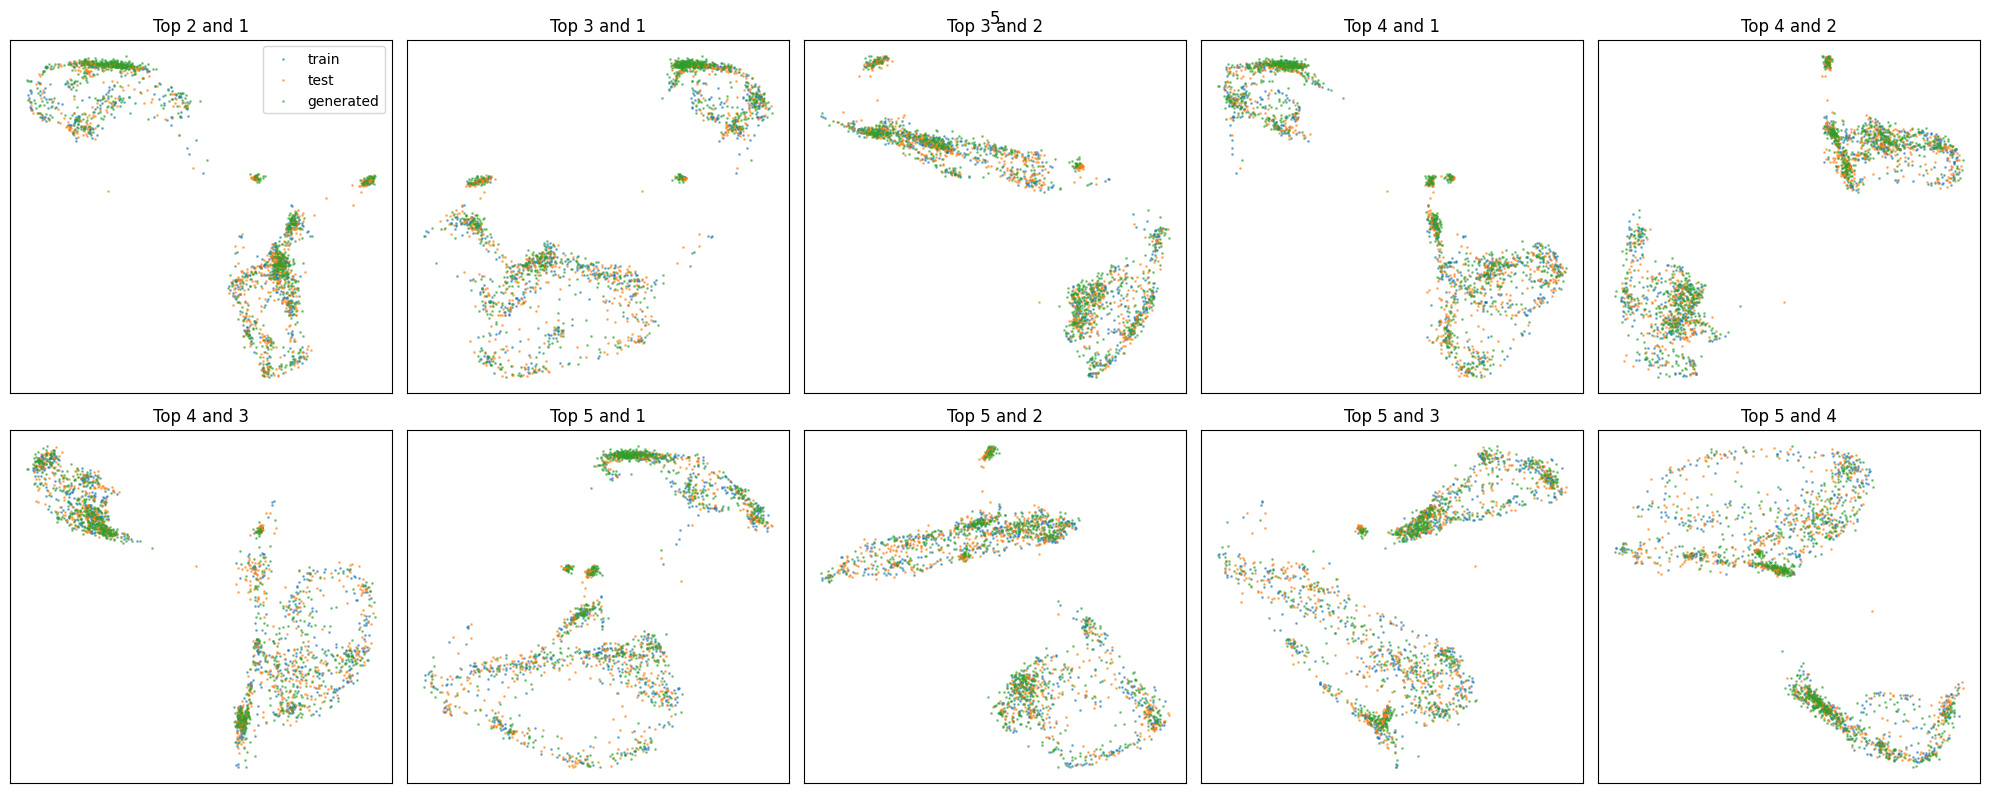

In [14]:
import matplotlib.pyplot as plt

# Initialize variables for managing the 5x5 grid and figure creation
fig_counter = 0
subplot_index = 1
max_subplots_per_fig = 25  # 5x5 grid
fig = plt.figure(figsize=(20, 20))  # Increase figsize as needed

for i in range(5):
    for j in range(i):
        # Check if the current figure's subplot limit has been reached
        if subplot_index > max_subplots_per_fig:
            break
            # # Show the current figure and start a new figure
            # plt.show()
            # fig_counter += 1
            # subplot_index = 1  # Reset subplot index for the new figure
            # fig = plt.figure(fig_counter, figsize=(20, 20))  # Create a new figure with a larger size

        # Create a subplot in the current figure
        ax = fig.add_subplot(5, 5, subplot_index)
        ax.scatter(res['latent_train_subset'][:,i], res['latent_train_subset'][:,j], s=1, alpha=0.5, label='train' if subplot_index == 1 else "")
        ax.scatter(res['latent_test'][:,i], res['latent_test'][:,j], s=1, alpha=0.5, label='test' if subplot_index == 1 else "")
        ax.scatter(res['latent_gen'][:,i], res['latent_gen'][:,j], s=1, alpha=0.5, label='generated' if subplot_index == 1 else "")
        ax.set_title(f'Top {i+1} and {j+1}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Increment the subplot index
        subplot_index += 1

        # Add the legend to the first subplot of each figure for clarity
        if subplot_index == 2:
            ax.legend()


# Show the last figure
plt.suptitle('5')
plt.tight_layout()
plt.show()


compare:
1. across dims
2. vs hvx

item 1: corr mat (top 100)

item 2: gene-gene plot reconstr

{'w_increasing_noise': array([[1.00000000e-01, 2.03214607e+01],
        [2.00000000e-01, 3.96447525e+01],
        [3.00000000e-01, 5.98163452e+01],
        [4.00000000e-01, 7.97855377e+01],
        [5.00000000e-01, 9.99509048e+01],
        [6.00000000e-01, 1.19227211e+02],
        [7.00000000e-01, 1.38546173e+02],
        [8.00000000e-01, 1.58398636e+02],
        [9.00000000e-01, 1.78154495e+02]]),
 'w_noise': array(111.07132, dtype=float32),
 'w_gen': array(69.54936, dtype=float32),
 'w_train': array(36.0708, dtype=float32),
 'latent_train_subset': array([[ -43.049187 ,   31.115114 ,   -3.2053425, ...,  -42.13344  ,
          -95.12567  ,   17.666218 ],
        [  46.90755  ,   -6.2108126,   19.31457  , ...,   17.1406   ,
         -131.09674  ,  -30.296312 ],
        [  48.572994 ,  -15.675593 ,   12.357952 , ...,   14.476212 ,
         -133.69737  ,  -23.779028 ],
        ...,
        [ -34.003273 ,   35.080147 ,  -27.248737 , ...,  -77.00638  ,
         -150.88599  ,   23.855272 ],


In [18]:
results[0]['data']

'eb_subset_all'

In [19]:
results[0]['emb_dim']

5

In [20]:
eb_res

data  emb_dim      w_gen     w_noise    w_train   mse_gen  \
5  sea_ad_gaba_all        5    48.9995   105.17234  33.755486  0.020667   
6  sea_ad_gaba_all       15  56.590214   115.12244   35.70637  0.025618   
7  sea_ad_gaba_all       20  57.222553  111.548294  35.721085  0.024168   
8  sea_ad_gaba_all       25  57.980907   111.69954  35.605717  0.028985   
9  sea_ad_gaba_all       30   69.54936   111.07132    36.0708  0.024930   

    mse_dec  
5  0.016524  
6  0.017931  
7  0.020316  
8  0.021506  
9  0.020752

In [21]:
eb_res = results_df[results_df['data'] == 'eb_subset_all']

In [25]:
eb_dict = {}
for res in results:
    if res['data'] == 'eb_subset_all':
        eb_dict[res['emb_dim']] = res

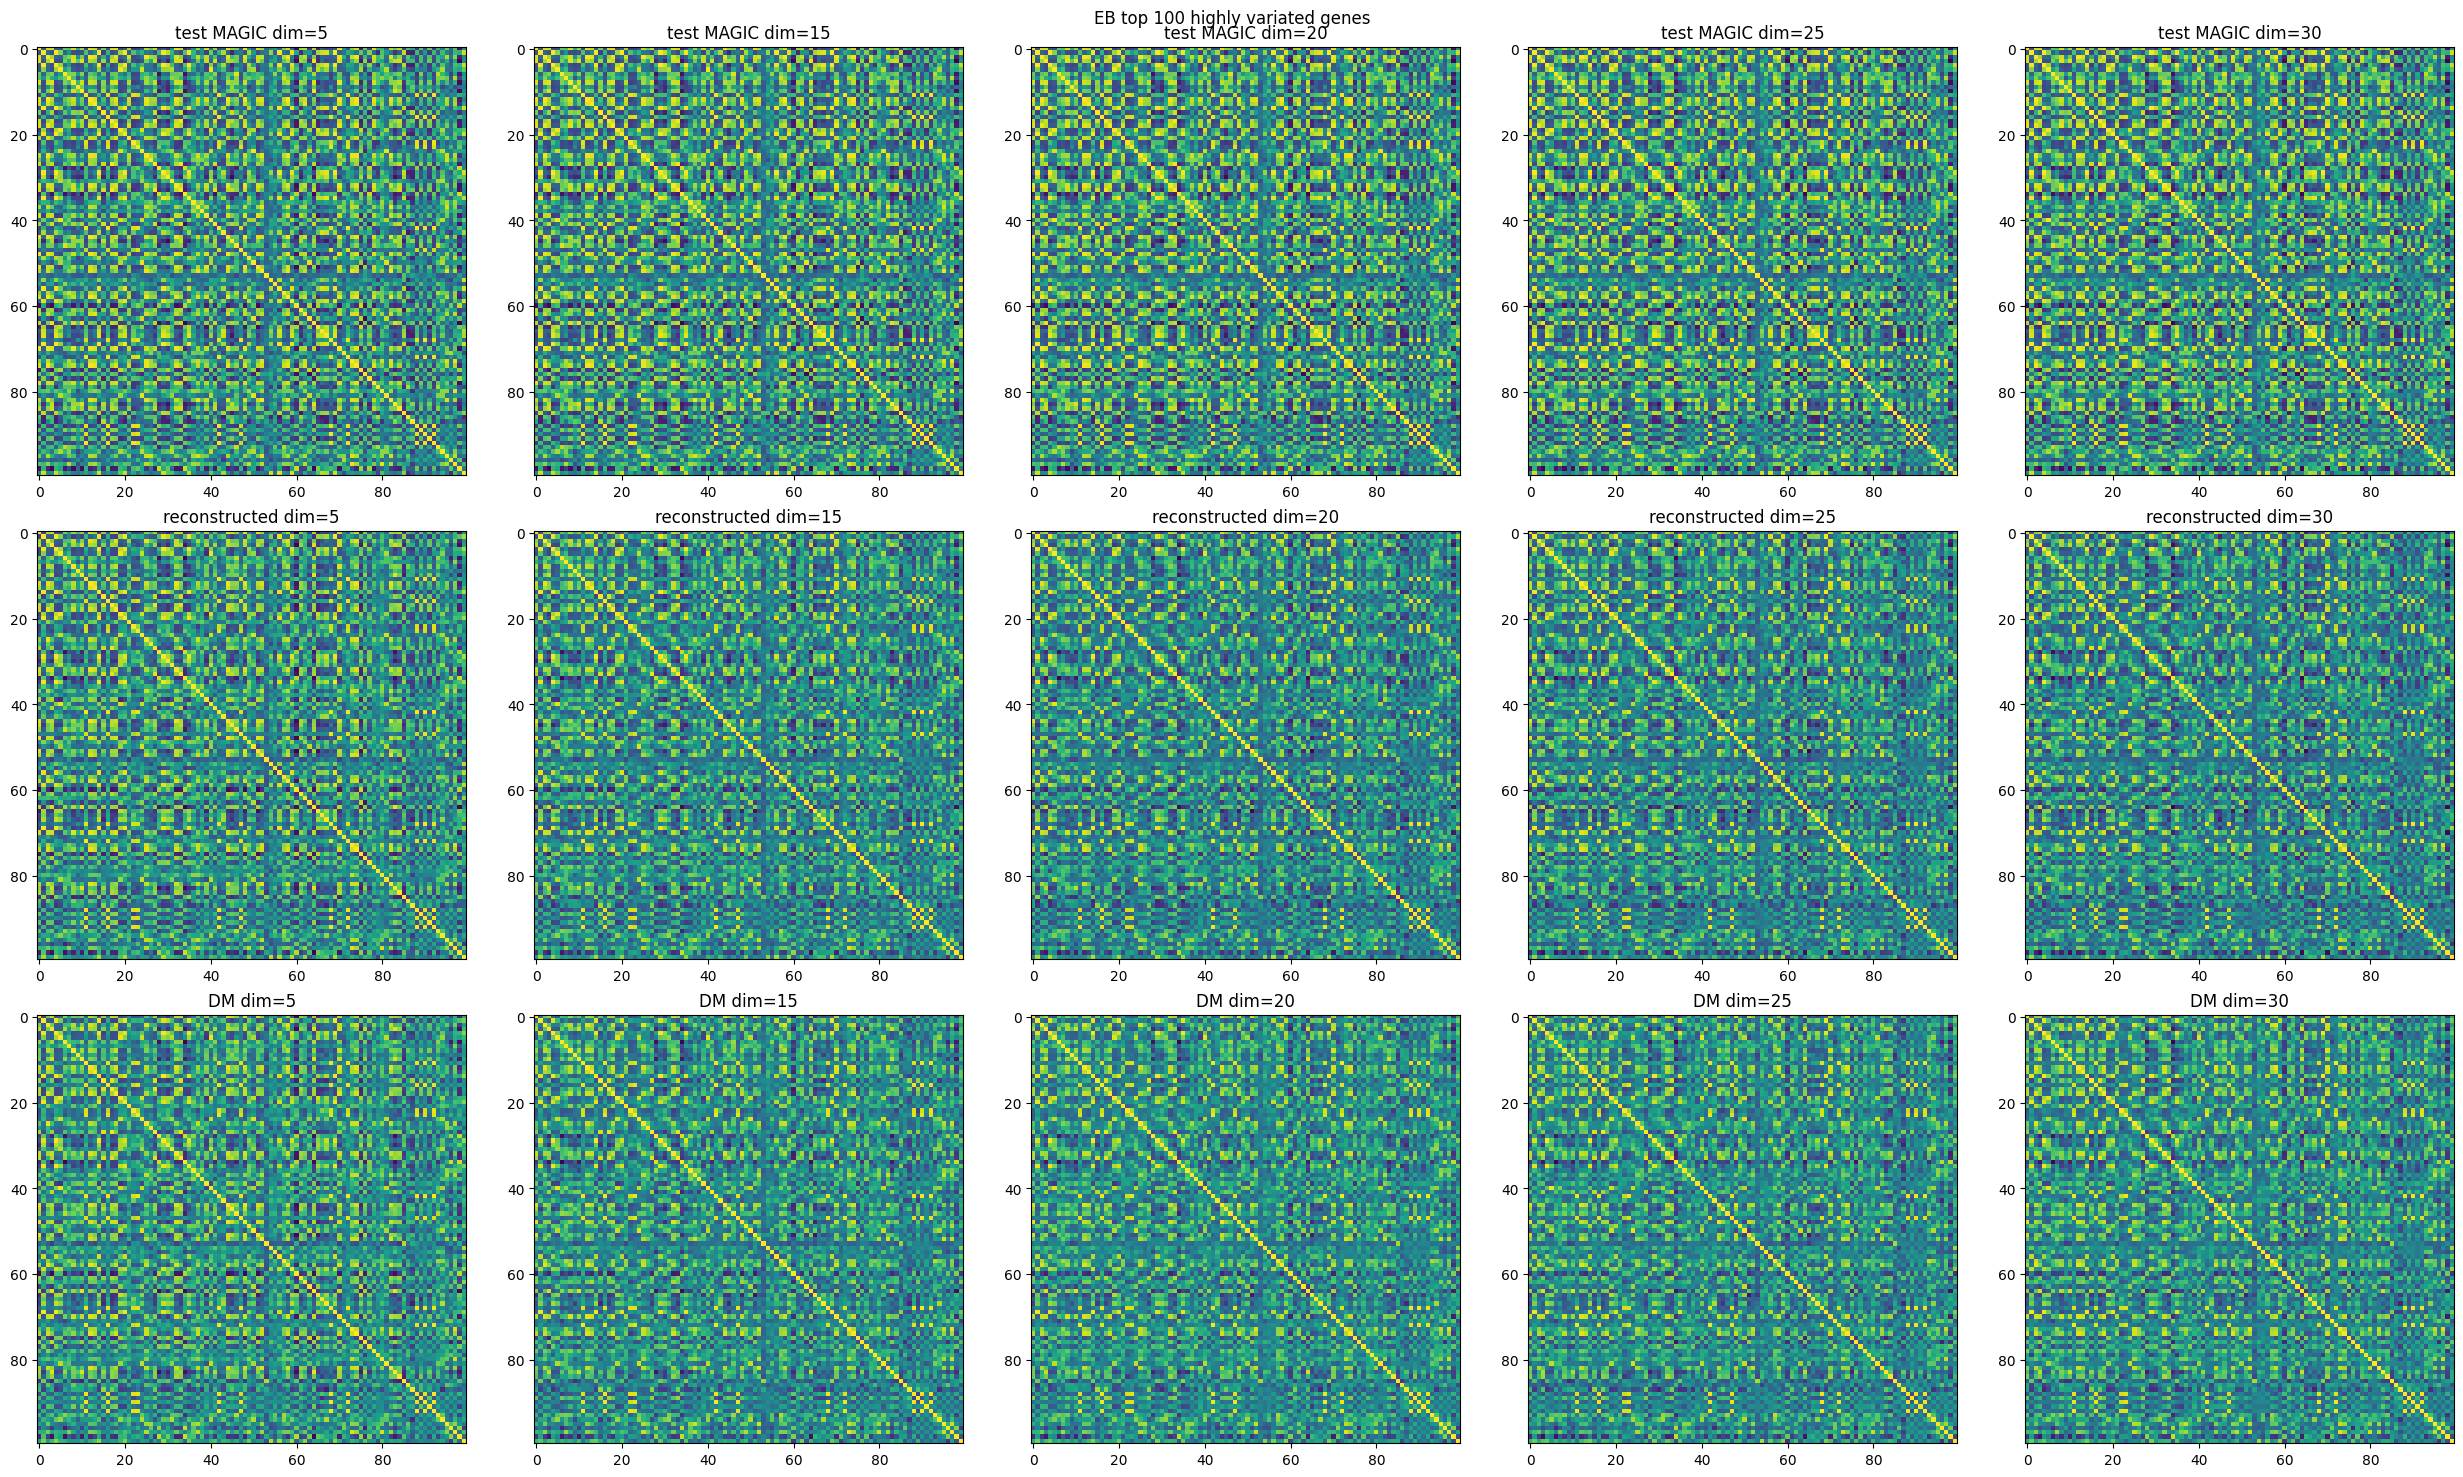

In [38]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=len(eb_res['emb_dim']), figsize=(len(eb_res['emb_dim'])*5, 15))
for i in range(len(eb_res['emb_dim'])):
    res = eb_dict[eb_res['emb_dim'][i]]
    axes[0,i].imshow(res['corrs_magic'][:100][:,:100])
    axes[0,i].set_title(f"test MAGIC dim={eb_res['emb_dim'][i]}")
    axes[1,i].imshow(res['corrs_dec'][:100][:,:100])
    axes[1,i].set_title(f"reconstructed dim={eb_res['emb_dim'][i]}")
    axes[2,i].imshow(res['corrs_gen'][:100][:,:100])
    axes[2,i].set_title(f"DM dim={eb_res['emb_dim'][i]}")
plt.suptitle('EB top 100 highly variated genes')
plt.tight_layout()

In [35]:
with open('cvx_results_eval_raw.pkl', 'rb') as file:
    results_cvx = pickle.load(file)

In [36]:
eb_dict_cvx = {}
for res in results_cvx:
    if res['data'] == 'eb_subset_all':
        eb_dict_cvx[res['emb_dim']] = res

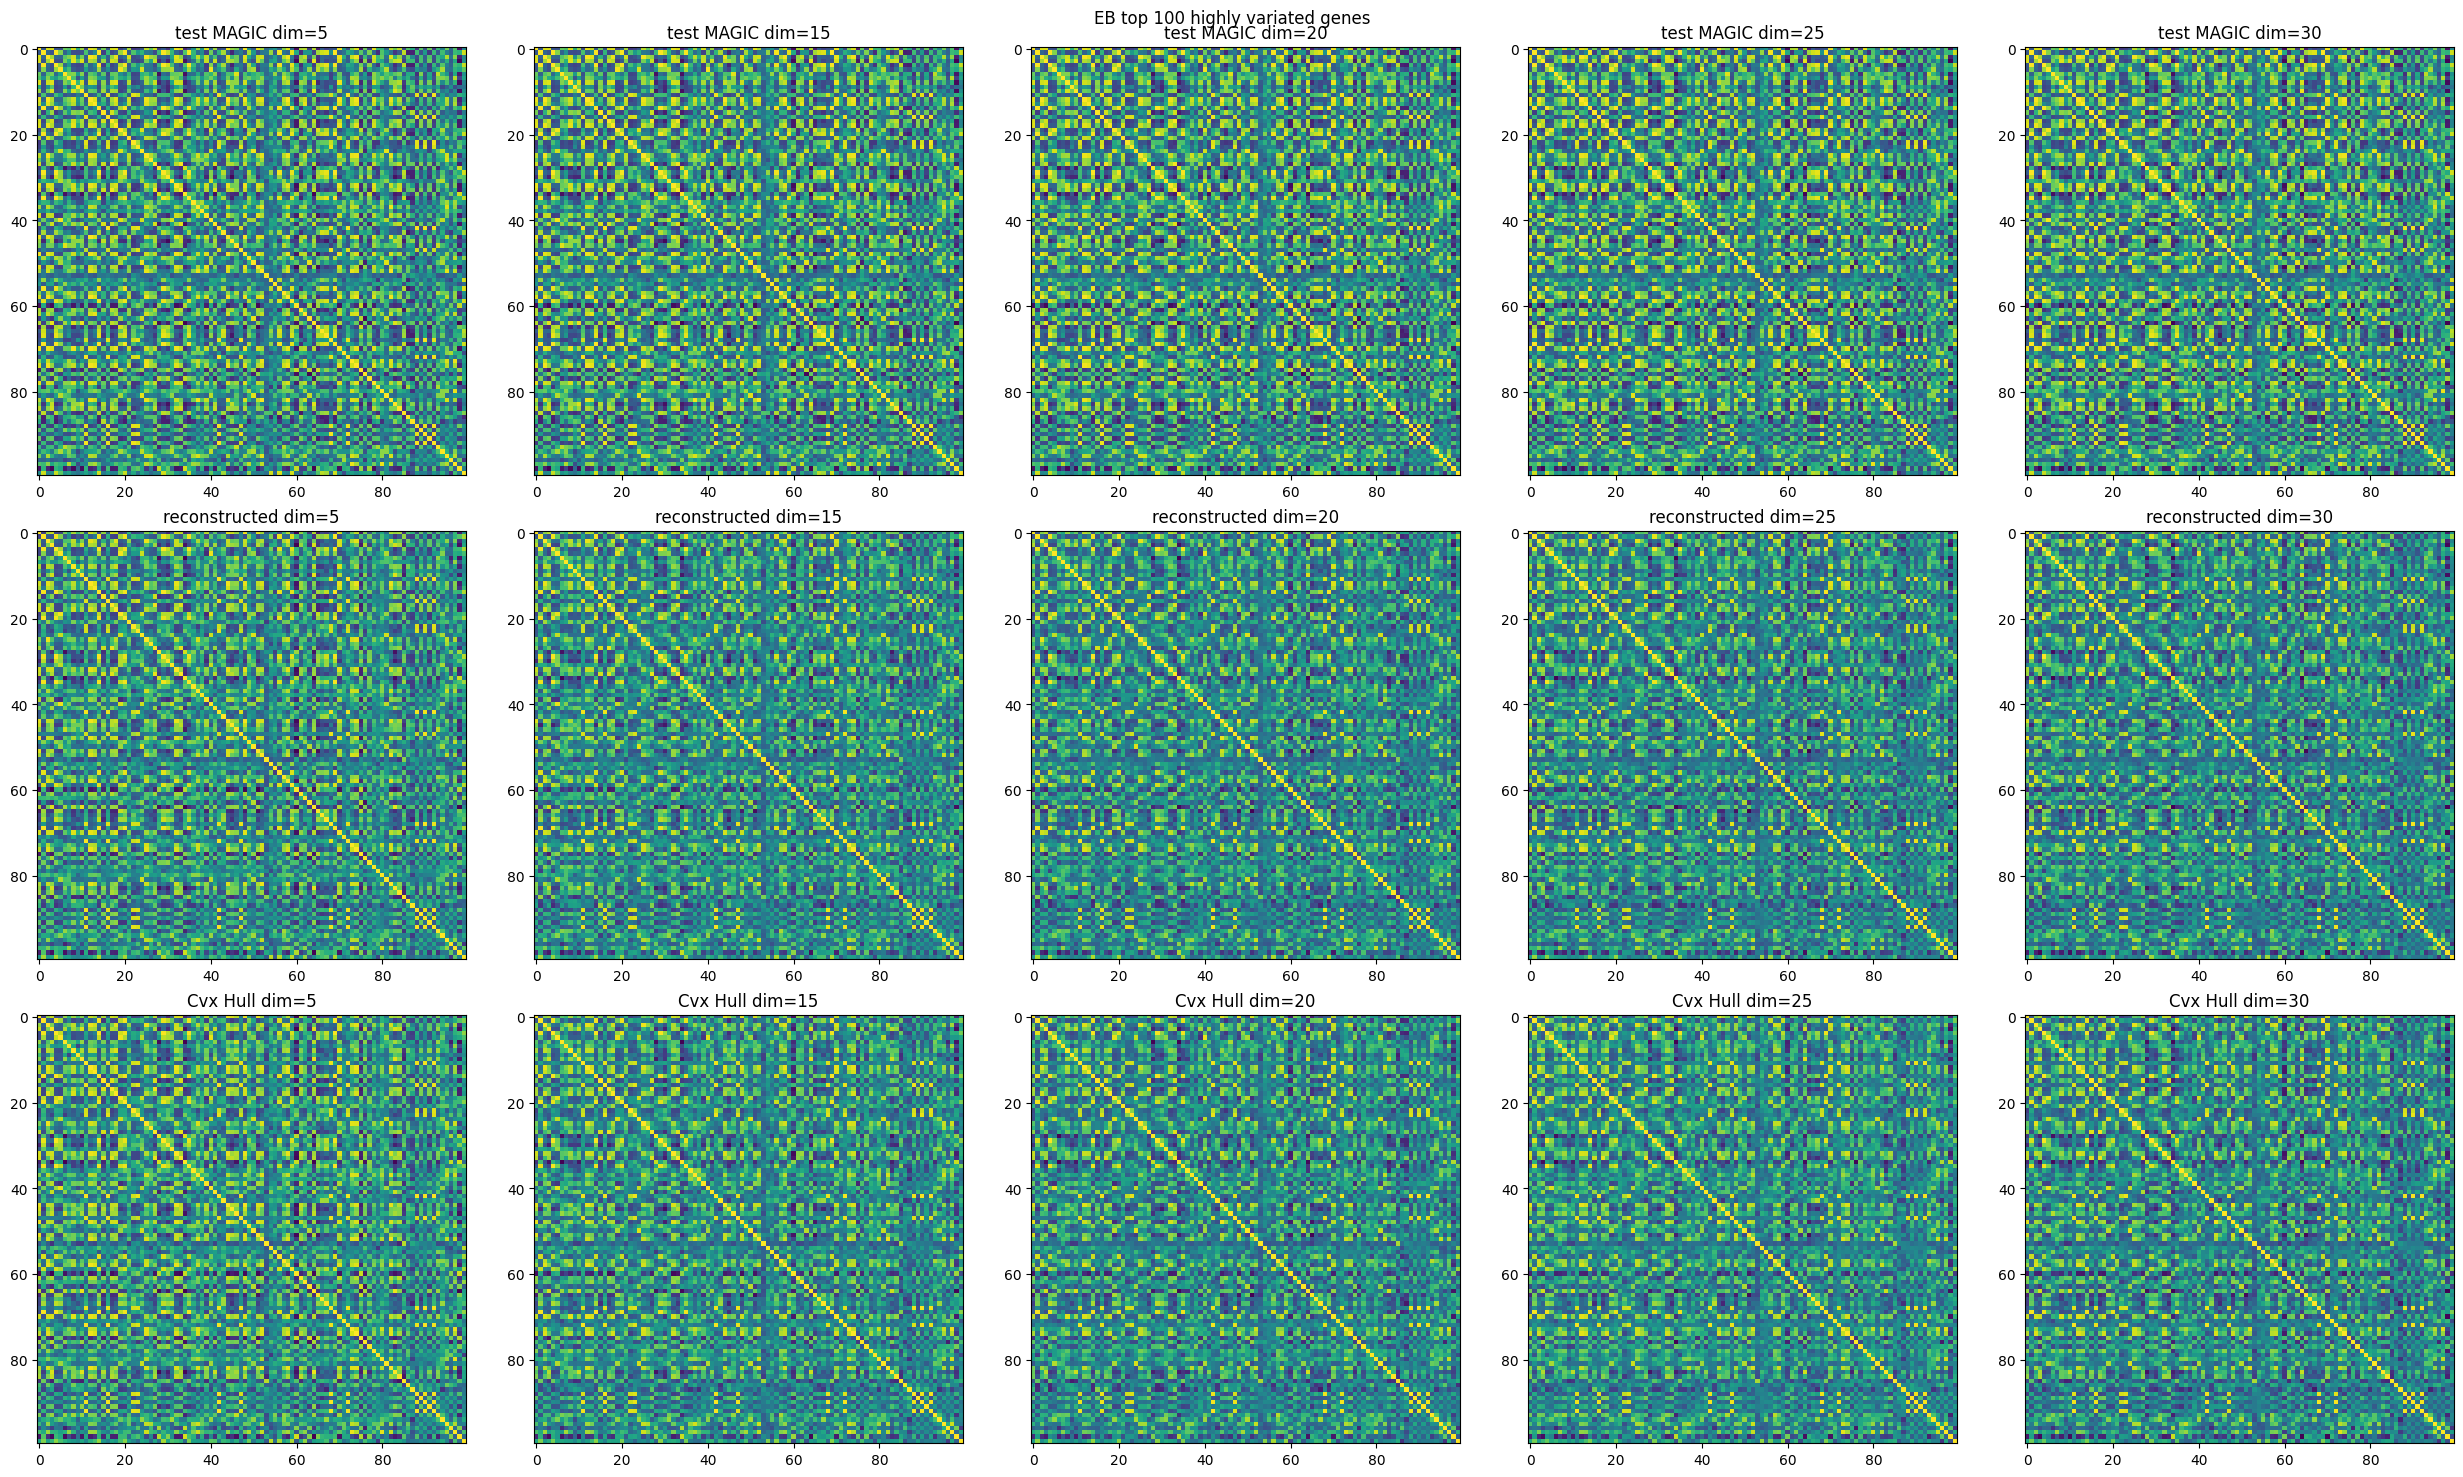

In [39]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=len(eb_res['emb_dim']), figsize=(len(eb_res['emb_dim'])*5, 15))
for i in range(len(eb_res['emb_dim'])):
    res = eb_dict_cvx[eb_res['emb_dim'][i]]
    axes[0,i].imshow(res['corrs_magic'][:100][:,:100])
    axes[0,i].set_title(f"test MAGIC dim={eb_res['emb_dim'][i]}")
    axes[1,i].imshow(res['corrs_dec'][:100][:,:100])
    axes[1,i].set_title(f"reconstructed dim={eb_res['emb_dim'][i]}")
    axes[2,i].imshow(res['corrs_gen'][:100][:,:100])
    axes[2,i].set_title(f"Cvx Hull dim={eb_res['emb_dim'][i]}")
plt.suptitle('EB top 100 highly variated genes')
plt.tight_layout()

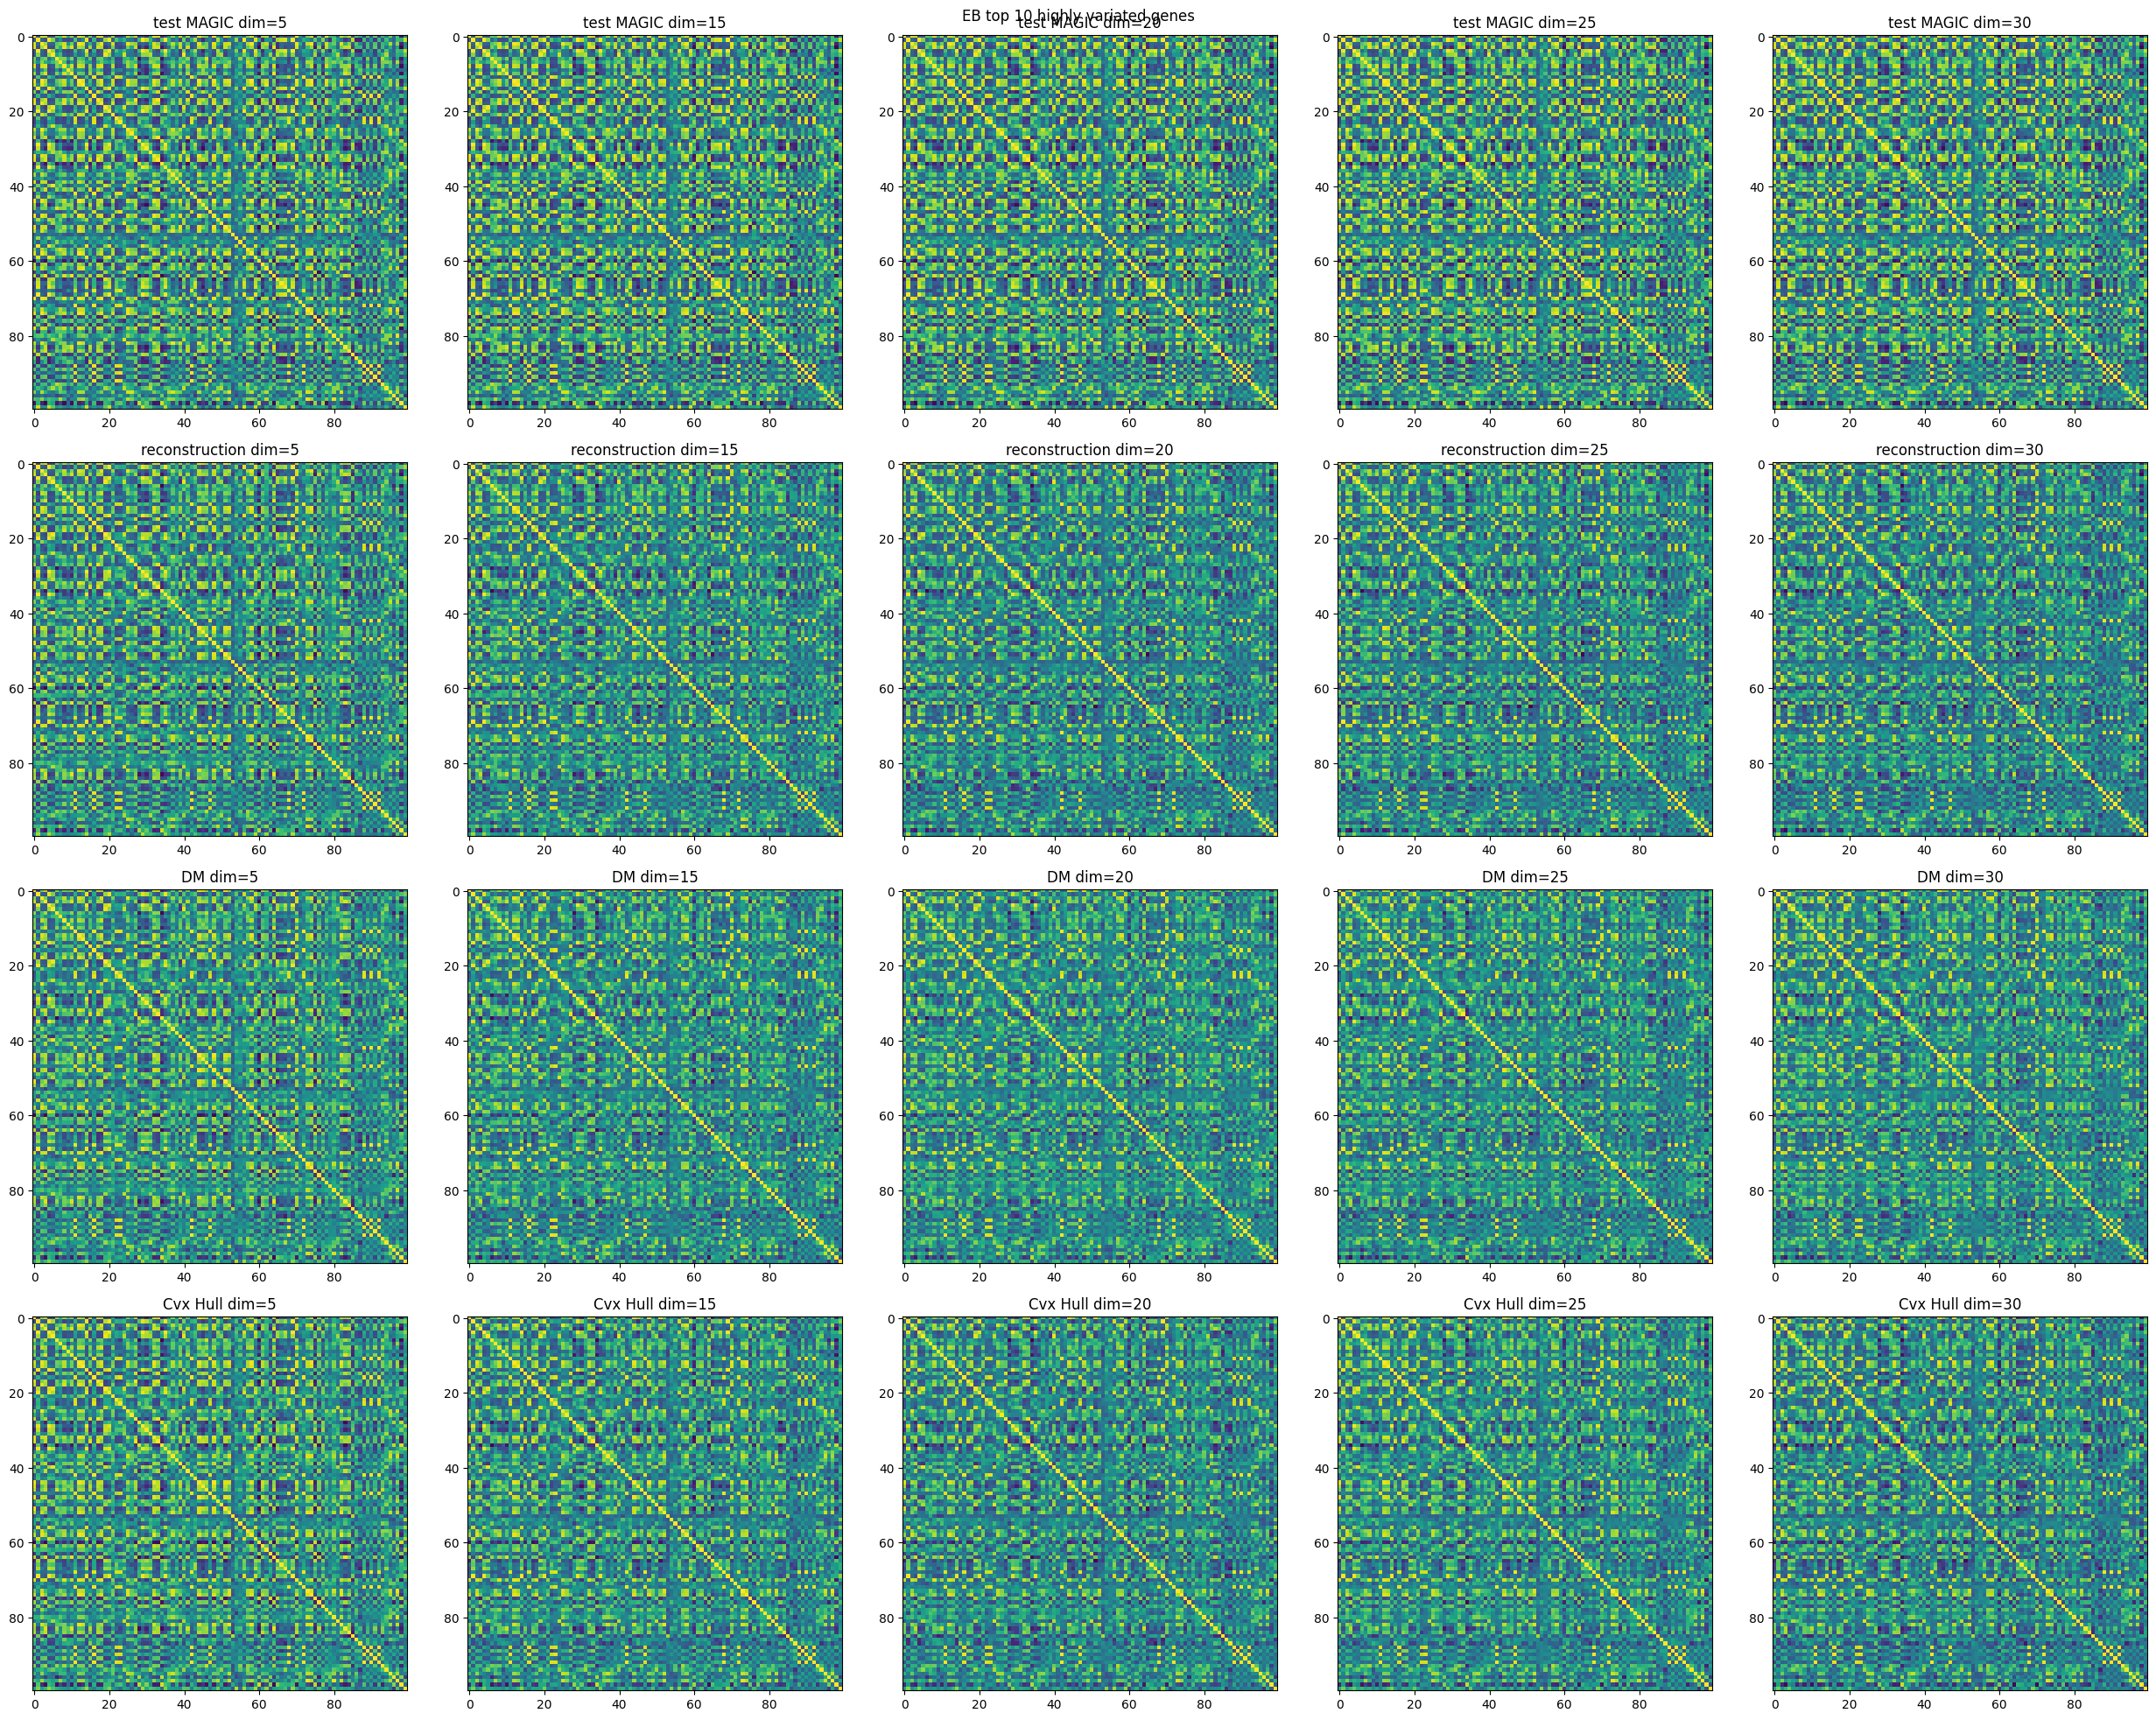

In [77]:
import matplotlib.pyplot as plt
d = 100
fig, axes = plt.subplots(nrows=4, ncols=len(eb_res['emb_dim']), figsize=(len(eb_res['emb_dim'])*5, 20))
for i in range(len(eb_res['emb_dim'])):
    res = eb_dict_cvx[eb_res['emb_dim'][i]]
    axes[0,i].imshow(res['corrs_magic'][:d][:,:d])
    axes[0,i].set_title(f"test MAGIC dim={eb_res['emb_dim'][i]}")
    axes[1,i].imshow(res['corrs_dec'][:d][:,:d])
    axes[1,i].set_title(f"reconstruction dim={eb_res['emb_dim'][i]}")
    res_dm = eb_dict[eb_res['emb_dim'][i]]
    axes[2,i].imshow(res_dm['corrs_gen'][:d][:,:d])
    axes[2,i].set_title(f"DM dim={eb_res['emb_dim'][i]}")
    axes[3,i].imshow(res['corrs_gen'][:d][:,:d])
    axes[3,i].set_title(f"Cvx Hull dim={eb_res['emb_dim'][i]}")
plt.suptitle('EB top 10 highly variated genes')
plt.tight_layout()

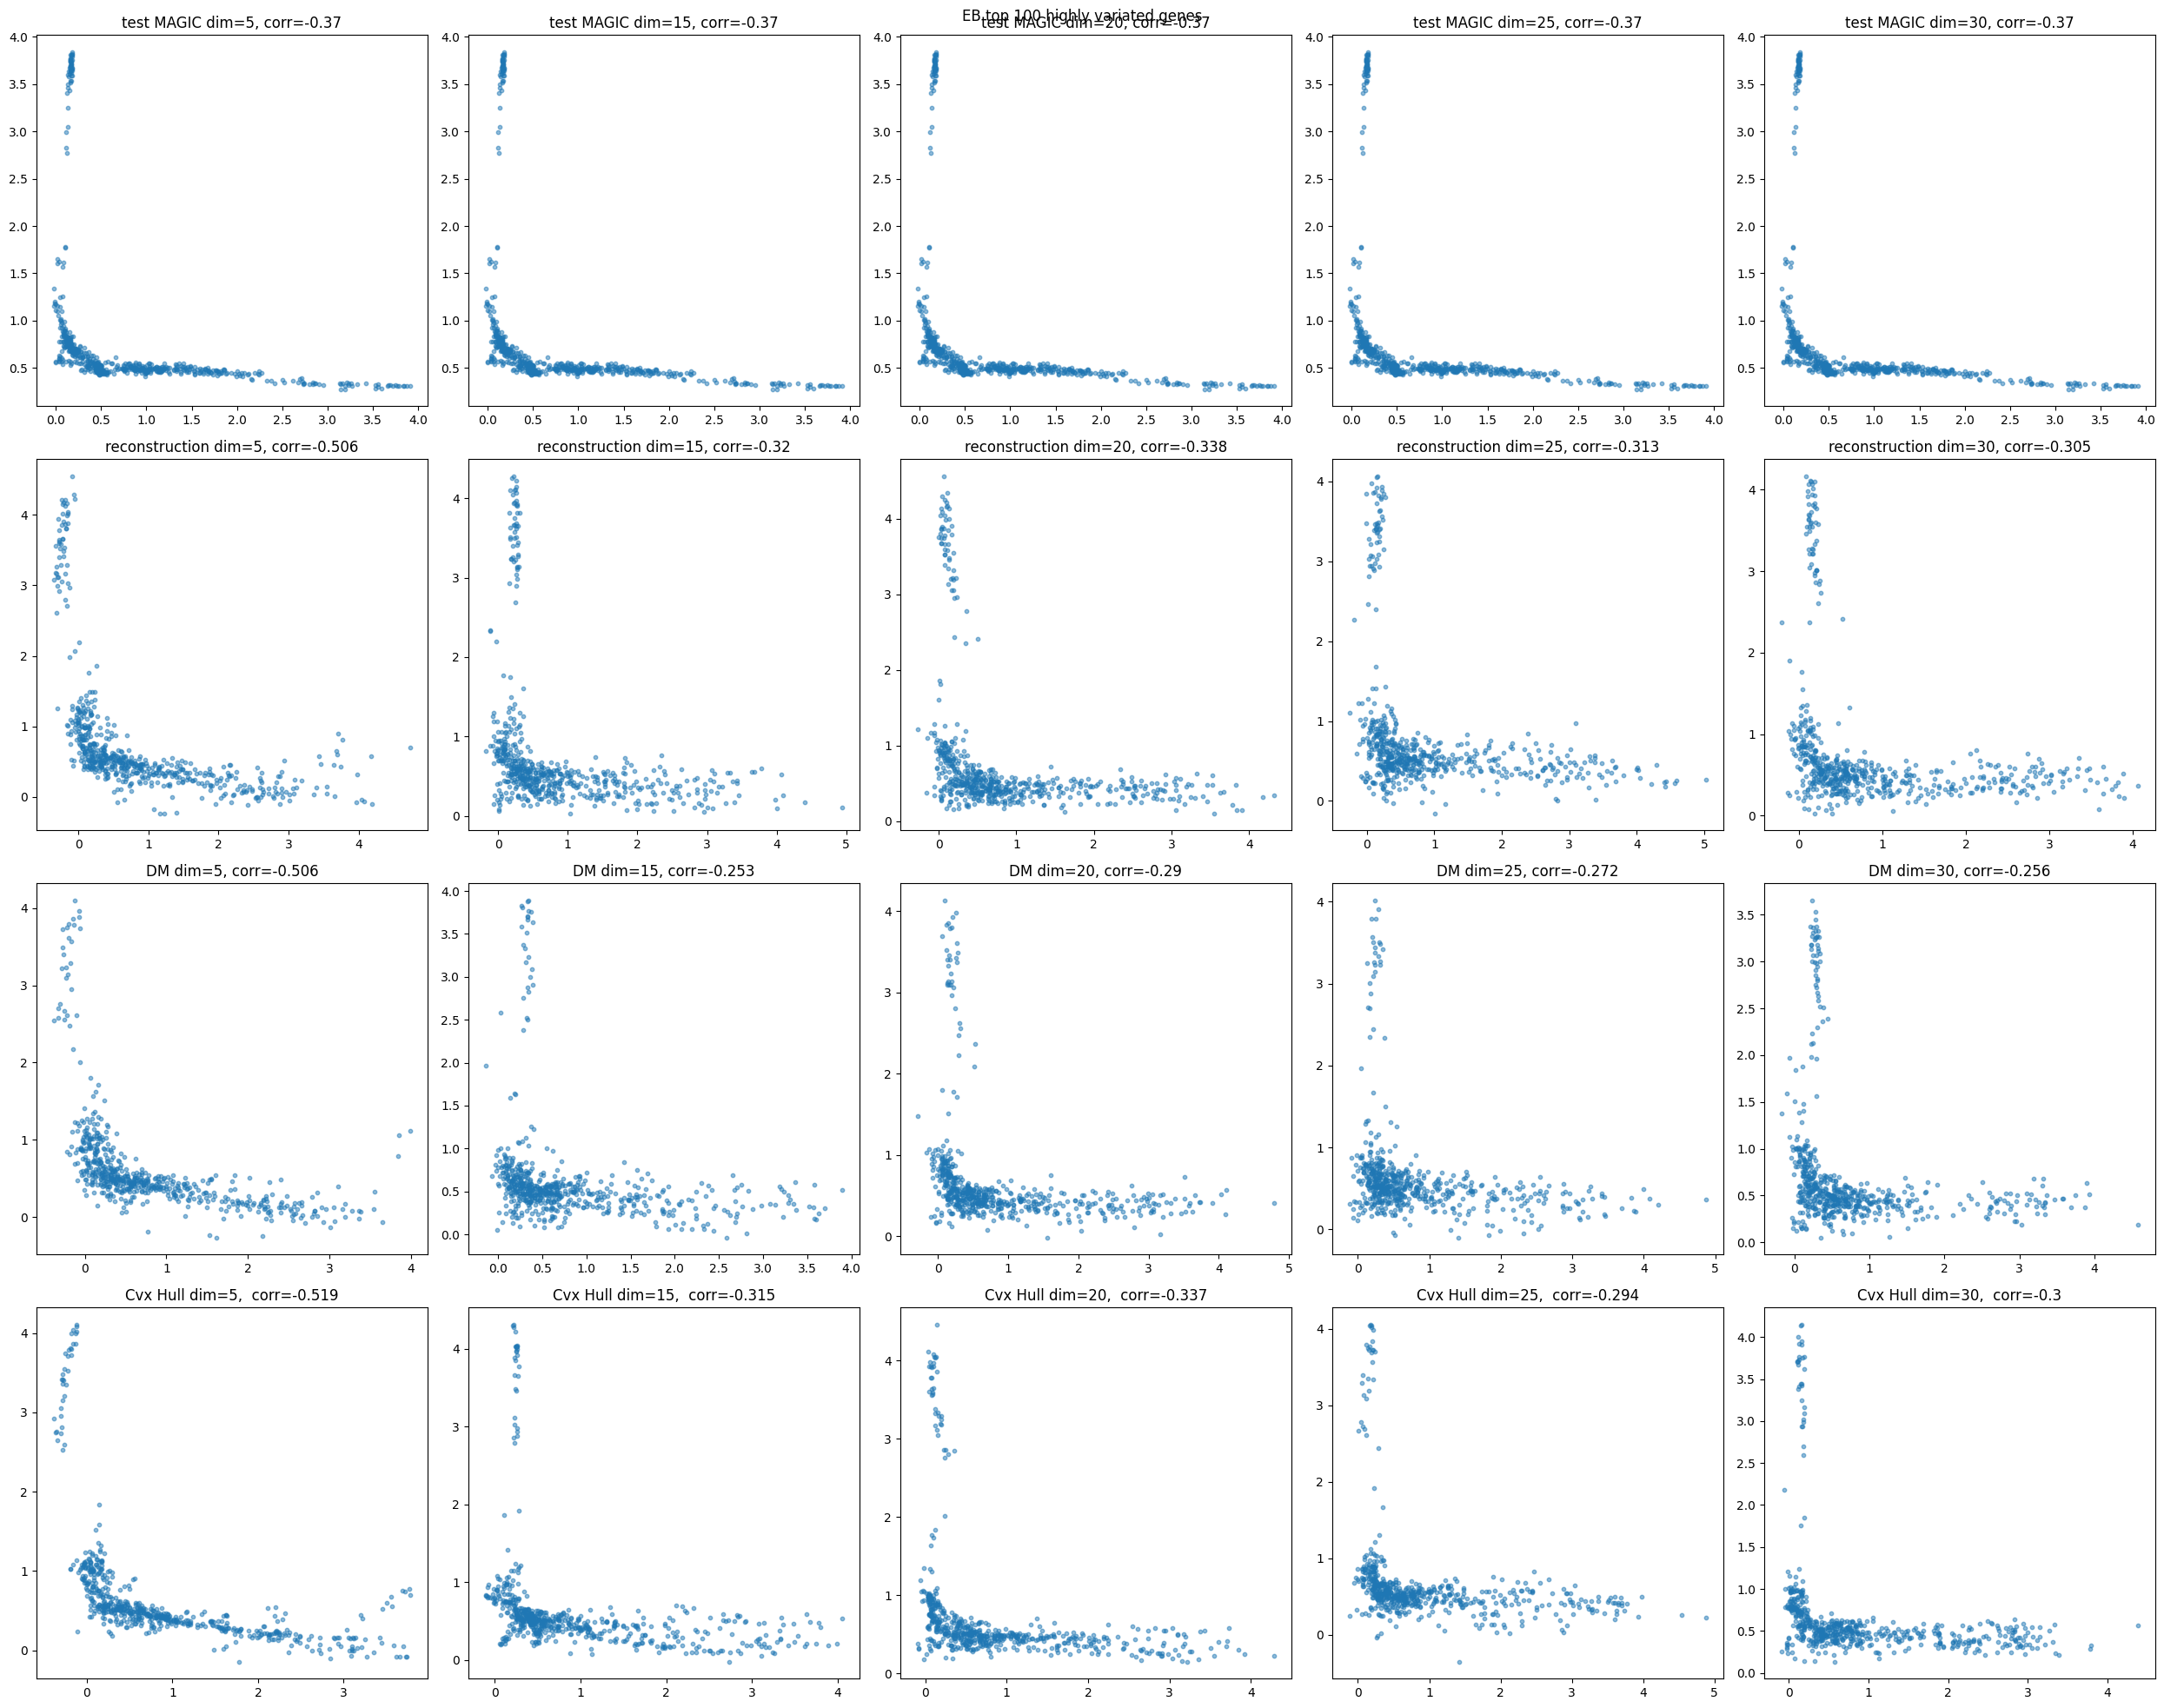

In [72]:
a = 0
b = 1
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=len(eb_res['emb_dim']), figsize=(len(eb_res['emb_dim'])*5, 20))
for i in range(len(eb_res['emb_dim'])):
    res = eb_dict_cvx[eb_res['emb_dim'][i]]
    # axes[0,i].imshow(res['corrs_magic'][:100][:,:100])
    axes[0,i].scatter(res['orig_magic'][:,res['top_100_idx'][a]], res['orig_magic'][:,res['top_100_idx'][b]], s=10, alpha=0.5, label=f'test MAGIC')
    axes[0,i].set_title(f"test MAGIC dim={eb_res['emb_dim'][i]}, corr={np.round(res['corrs_magic'][a,b],3)}")
    axes[1,i].scatter(res['orig_dec'][:,res['top_100_idx'][a]], res['orig_dec'][:,res['top_100_idx'][b]], s=10, alpha=0.5, label=f'test MAGIC')
    axes[1,i].set_title(f"reconstruction dim={eb_res['emb_dim'][i]}, corr={np.round(res['corrs_dec'][a,b],3)}")
    res_dm = eb_dict[eb_res['emb_dim'][i]]
    # axes[1,i].imshow(res_dm['corrs_gen'][:100][:,:100])
    axes[2,i].scatter(res_dm['orig_gen'][:,res_dm['top_100_idx'][a]], res_dm['orig_gen'][:,res_dm['top_100_idx'][b]], s=10, alpha=0.5, label='DM')
    axes[2,i].set_title(f"DM dim={eb_res['emb_dim'][i]}, corr={np.round(res_dm['corrs_gen'][a,b],3)}")
    # axes[2,i].imshow(res['corrs_gen'][:100][:,:100])
    axes[3,i].scatter(res['orig_gen'][:,res['top_100_idx'][a]], res['orig_gen'][:,res['top_100_idx'][b]], s=10, alpha=0.5, label='Cvx Hull')
    axes[3,i].set_title(f"Cvx Hull dim={eb_res['emb_dim'][i]},  corr={np.round(res['corrs_gen'][a,b],3)}")
plt.suptitle('EB top 100 highly variated genes')
plt.tight_layout()

In [65]:
res_dm = eb_dict[30]
err = (res_dm['corrs_magic'] -  res_dm['corrs_gen'])**2

array([[0.00000000e+00, 1.29923422e-02, 3.24182442e-02, ...,
        1.11789820e-01, 3.53480284e-03, 4.99225881e-02],
       [1.29923422e-02, 0.00000000e+00, 1.69719743e-02, ...,
        1.47732756e-01, 5.03848481e-02, 1.04510685e-02],
       [3.24182442e-02, 1.69719743e-02, 0.00000000e+00, ...,
        3.60565248e-02, 6.53029783e-02, 4.56895094e-02],
       ...,
       [1.11789820e-01, 1.47732756e-01, 3.60565248e-02, ...,
        4.93038066e-32, 1.41124360e-01, 3.47533886e-02],
       [3.53480284e-03, 5.03848481e-02, 6.53029783e-02, ...,
        1.41124360e-01, 1.23259516e-32, 1.95168490e-03],
       [4.99225881e-02, 1.04510685e-02, 4.56895094e-02, ...,
        3.47533886e-02, 1.95168490e-03, 0.00000000e+00]])

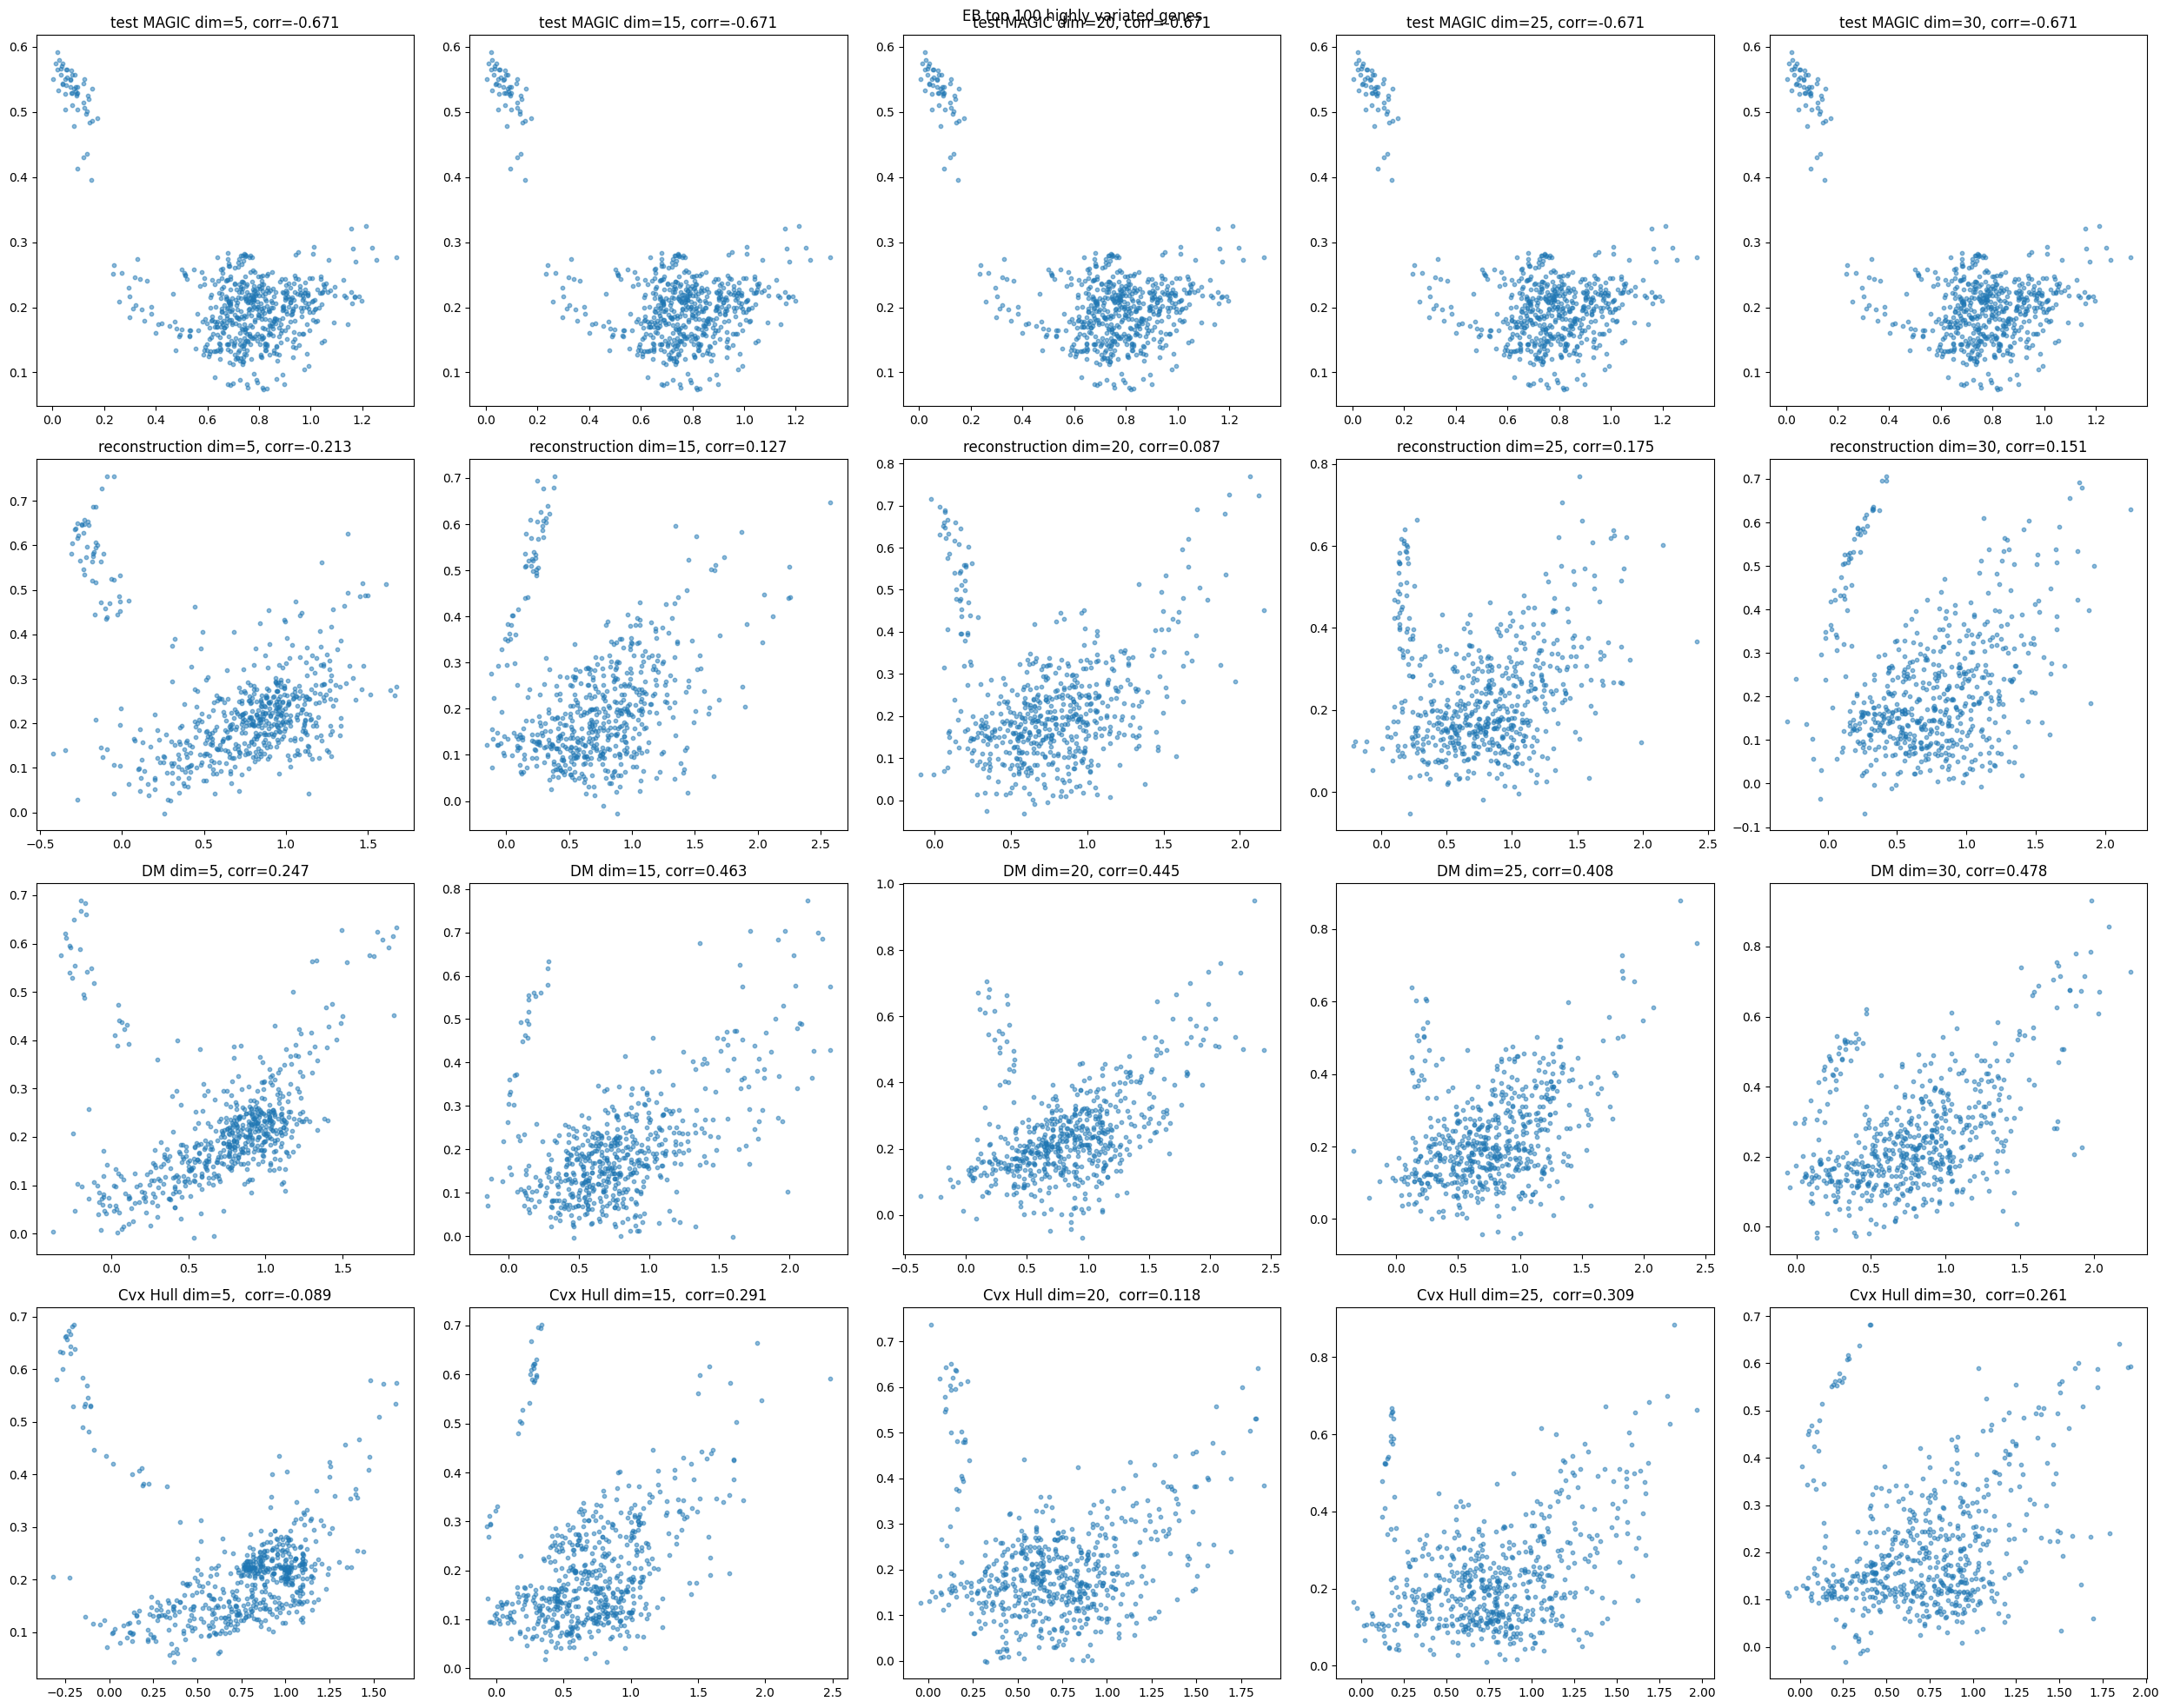

In [73]:
flat_index_of_max = np.argmax(err)
a, b = np.unravel_index(flat_index_of_max, err.shape)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=len(eb_res['emb_dim']), figsize=(len(eb_res['emb_dim'])*5, 20))
for i in range(len(eb_res['emb_dim'])):
    res = eb_dict_cvx[eb_res['emb_dim'][i]]
    # axes[0,i].imshow(res['corrs_magic'][:100][:,:100])
    axes[0,i].scatter(res['orig_magic'][:,res['top_100_idx'][a]], res['orig_magic'][:,res['top_100_idx'][b]], s=10, alpha=0.5, label=f'test MAGIC')
    axes[0,i].set_title(f"test MAGIC dim={eb_res['emb_dim'][i]}, corr={np.round(res['corrs_magic'][a,b],3)}")
    axes[1,i].scatter(res['orig_dec'][:,res['top_100_idx'][a]], res['orig_dec'][:,res['top_100_idx'][b]], s=10, alpha=0.5, label=f'test MAGIC')
    axes[1,i].set_title(f"reconstruction dim={eb_res['emb_dim'][i]}, corr={np.round(res['corrs_dec'][a,b],3)}")
    res_dm = eb_dict[eb_res['emb_dim'][i]]
    # axes[1,i].imshow(res_dm['corrs_gen'][:100][:,:100])
    axes[2,i].scatter(res_dm['orig_gen'][:,res_dm['top_100_idx'][a]], res_dm['orig_gen'][:,res_dm['top_100_idx'][b]], s=10, alpha=0.5, label='DM')
    axes[2,i].set_title(f"DM dim={eb_res['emb_dim'][i]}, corr={np.round(res_dm['corrs_gen'][a,b],3)}")
    # axes[2,i].imshow(res['corrs_gen'][:100][:,:100])
    axes[3,i].scatter(res['orig_gen'][:,res['top_100_idx'][a]], res['orig_gen'][:,res['top_100_idx'][b]], s=10, alpha=0.5, label='Cvx Hull')
    axes[3,i].set_title(f"Cvx Hull dim={eb_res['emb_dim'][i]},  corr={np.round(res['corrs_gen'][a,b],3)}")
plt.suptitle('EB top 100 highly variated genes')
plt.tight_layout()

In [45]:
res['top_100_idx'][0]

303